# KNN, NB, LR, SVM, DT, RF, XGBOOST Modeling - Bank Marketing Dataset

In [17]:
# importing required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures


In [18]:
#Reading Preprocessed data. First column is deleted because its index and redundant
df=pd.read_csv("PreprocessedBank.csv").drop(['Unnamed: 0'],axis=1)

In [19]:
#dispaly first 5 rows
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jun,mar,may,nov,oct,sep,failure,success,unknown,deposit
0,59,1,2343,0,1,5,1042,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
1,56,1,45,1,1,5,1467,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
2,41,1,1270,0,1,5,1389,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
3,55,1,2476,0,1,5,579,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
4,54,1,184,1,1,5,673,2,-1,0,...,0,0,1,0,0,0,0,0,1,1


In [20]:
#Standardisation of Data
scaler=StandardScaler()
scaler.fit(df.drop('deposit',axis=1))
scaled_features=scaler.transform(df.drop('deposit',axis=1))
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,1.491505,0.123617,0.252525,-1.055280,0.387923,-1.265746,1.930226,-0.554168,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
1,1.239676,0.123617,-0.459974,0.947616,0.387923,-1.265746,3.154612,-0.554168,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
2,-0.019470,0.123617,-0.080160,-1.055280,0.387923,-1.265746,2.929901,-0.554168,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
3,1.155733,0.123617,0.293762,-1.055280,0.387923,-1.265746,0.596366,-0.554168,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
4,1.071790,0.123617,-0.416876,0.947616,0.387923,-1.265746,0.867171,-0.186785,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626


**Notes :** 
1. Algorithms like KNN, Naive bayes, Logistic Regression and SVM require Standardised Data
2. Tree based Algorithms are scale independant
3. standardisation basically subtracts mean and divides std deviation of column from each value

# Train Test Split

In [109]:
# 30% Data is set aside for tesing
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df['deposit'],test_size=0.30, random_state=3)

# Applying KNN

In [15]:
# trying different odd values of k for KNN and finding accuracy for them

knn = KNeighborsClassifier(n_neighbors=1)
accuracy_rate=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())
print(accuracy_rate)

[0.728145763677625, 0.7556652399867703, 0.7614259376299649, 0.7620659787602622, 0.7641156167416029, 0.7610418147106307, 0.7593762996486241, 0.7578411178533653, 0.7560493629061044, 0.7560495266413642, 0.7531065490829187, 0.7538739762452884, 0.7509314898926224, 0.7488831617933596, 0.7499069983724714, 0.747474219883355, 0.7472183016723919, 0.7474753660301732, 0.7472196115544698, 0.7465807165709907]


Text(0, 0.5, 'Accuracy rate')

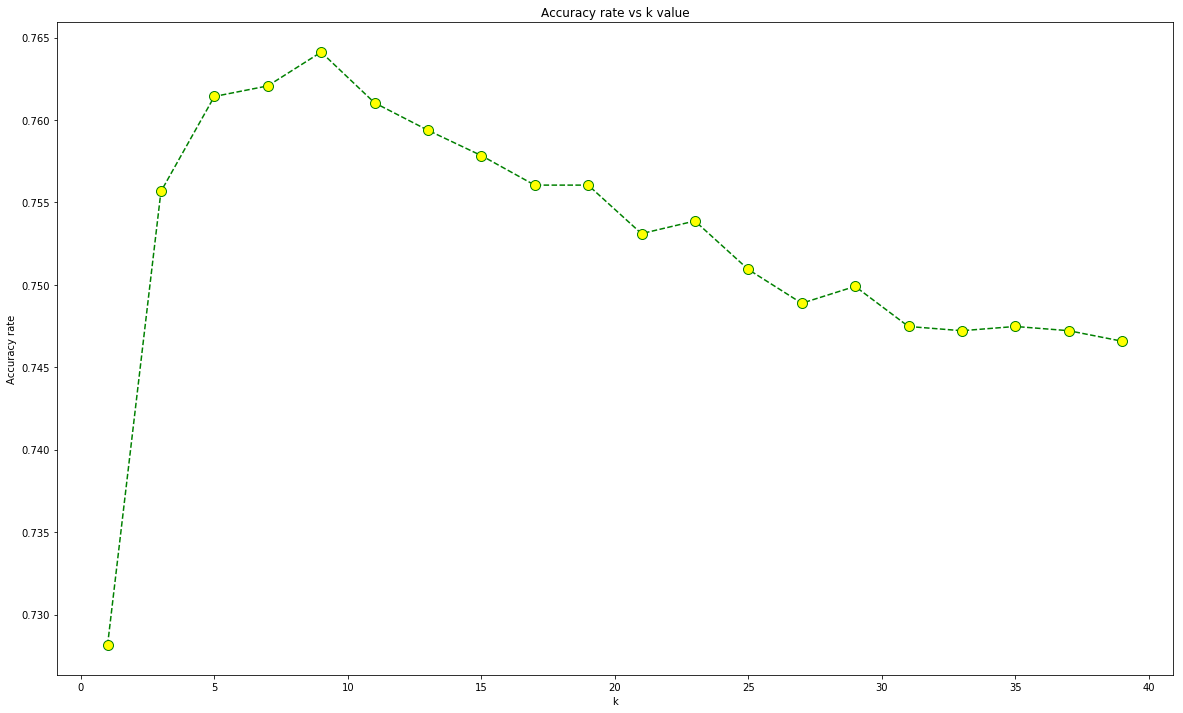

In [16]:
# plotting accuracy of KNN for every value of K. Accuracy is highest when K=9

plt.figure(figsize=(20,12))
plt.plot(range(1,40,2),accuracy_rate,color='green',linestyle='dashed',marker='o',markerfacecolor='yellow',markersize=10)
plt.title('Accuracy rate vs k value')
plt.xlabel('k')
plt.ylabel('Accuracy rate')

In [29]:
    # TRaining KNN agaib for best value of K
    # Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report

    knn = KNeighborsClassifier(n_neighbors=9)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    y_pred_prob = knn.predict_proba(X_test)
    aucScoreKNN = roc_auc_score(y_test,  y_pred_prob[:,1])
    fprKNN, tprKNN, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print("AUC score for KNN is ",aucScoreKNN)
    print("Test Accuracy score for KNN is ",accuracy_score(y_test, pred))
    predT=knn.predict(X_train)
    print("Train Accuracy score for KNN is ",accuracy_score(y_train, predT))
    #print("Best parameters for KNN are ",knn.best_params_)


[[1484  290]
 [ 554 1021]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78      1774
           1       0.78      0.65      0.71      1575

    accuracy                           0.75      3349
   macro avg       0.75      0.74      0.74      3349
weighted avg       0.75      0.75      0.75      3349

AUC score for KNN is  0.8285929027755408
Test Accuracy score for KNN is  0.7479844729770081
Train Accuracy score for KNN is  0.8123640087034429


In [21]:
# Training KNN for different odd values of K to find maximum Recall

knn = KNeighborsClassifier()
recall_rate=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10,scoring='recall')
    recall_rate.append(score.mean())
print(recall_rate)

[0.6777178796046721, 0.6962901776657102, 0.6852599773932702, 0.6779939425557198, 0.6707184882473988, 0.6615634872329942, 0.6542873083499986, 0.6480979914790017, 0.6411007738457525, 0.6357150102889604, 0.6308712285888184, 0.6273708083355071, 0.6206438570559082, 0.6147190099411646, 0.6136408428252615, 0.605561835202736, 0.6050205779207605, 0.603407674694954, 0.6009854215575458, 0.6001818682433411]


Text(0, 0.5, 'Accuracy rate')

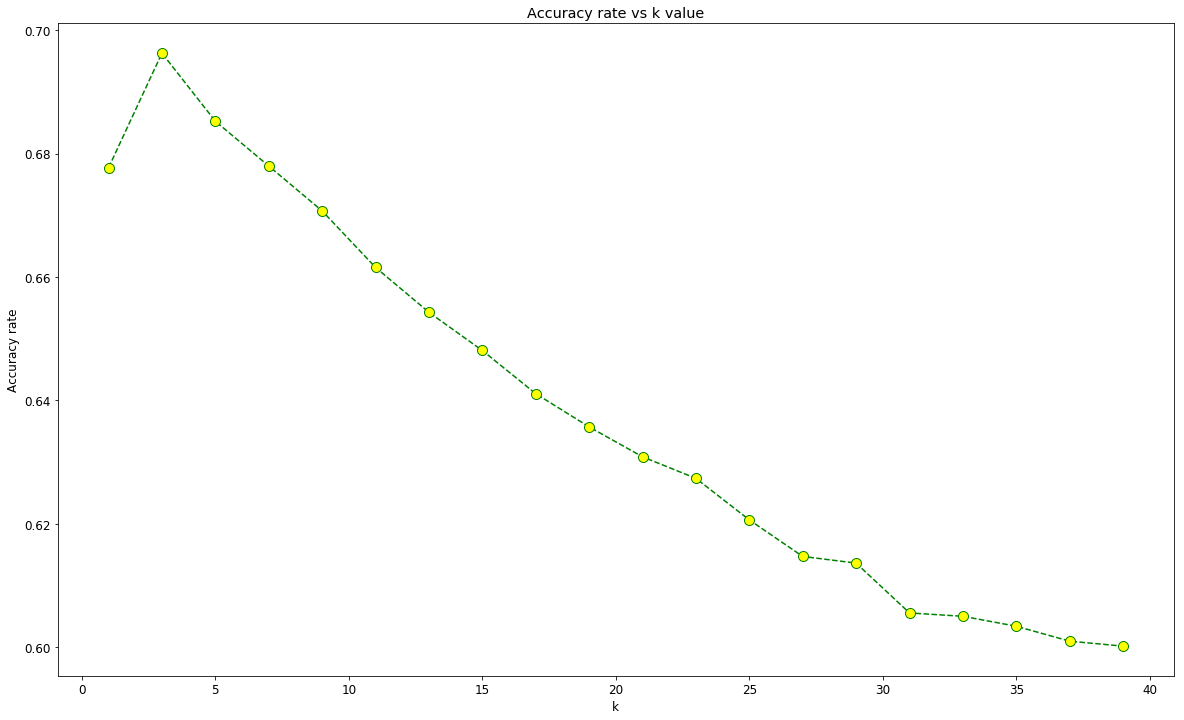

In [33]:
# plotting recall of values of K

plt.figure(figsize=(20,12))
plt.plot(range(1,40,2),recall_rate,color='green',linestyle='dashed',marker='o',markerfacecolor='yellow',markersize=10)
plt.title('Accuracy rate vs k value')
plt.xlabel('k')
plt.ylabel('Accuracy rate')

In [34]:

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print("Test Recall score for KNN is ",recall_score(y_test, pred))
predT=knn.predict(X_train)
print("Train Recall score for KNN is ",recall_score(y_train, predT))
#print("Best parameters for KNN are ",knn.best_params_)


Test Recall score for KNN is  0.6819047619047619
Train Recall score for KNN is  0.8387183629509962


**Notes:**
1. KNN gives accuracy of 0.74 which is not very good
2. There is not much difference between train and test accuracy so its not overfitting or underfitting
3. Recall is 0.68 whihc is not very good 

# Applying Naive Bayes

In [110]:
# Training Naive bayes
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report

gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
accNB = accuracy_score(y_test, pred)
y_pred_prob = gnb.predict_proba(X_test)
aucScoreNB = roc_auc_score(y_test,  y_pred_prob[:,1])
fprNB, tprNB, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for NB is ",aucScoreNB)
print("Test Accuracy score for NB is ",accuracy_score(y_test, pred))
predT=gnb.predict(X_train)
print("Train Accuracy score for NB is ",accuracy_score(y_train, predT))
#print("Best parameters for NB are ",gnb.best_params_)
print("Recall score for NB is ",recall_score(y_test, pred))


[[1517  257]
 [ 737  838]]
              precision    recall  f1-score   support

           0       0.67      0.86      0.75      1774
           1       0.77      0.53      0.63      1575

    accuracy                           0.70      3349
   macro avg       0.72      0.69      0.69      3349
weighted avg       0.72      0.70      0.69      3349

AUC score for NB is  0.7965192104650956
Test Accuracy score for NB is  0.7031949835771872
Train Accuracy score for NB is  0.7317291693331627
Recall score for NB is  0.532063492063492


**Notes:**
1. Naive Bayes gives accuracy of 0.70 which is not very good
2. There is very less difference between train and test accuracy so its not overfitting or underfitting
3. Recall is 0.53 which is very poor 

# Applying Logistic Regression

In [35]:

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 10000]
    }
]
logModel = LogisticRegression()




**Notes:**
1. Hyperparameters for Logistic Regression
2. Penalty indicates which regularization to use
3. C decides how much weightage is given to Regularization
4. Solver is the technique used internally
5. max_iter is the number of iterations for convergence

In [36]:
#GridserchCV tries all possible combinations of hyperparameters to find best accuracy

clf = GridSearchCV(logModel, param_grid = param_grid,scoring='accuracy', cv = 5 )
best_clf = clf.fit(X_train,y_train)

In [37]:
# Training Logistic Regression
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report

pred = best_clf.predict(X_test)
accLR = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreLR = roc_auc_score(y_test,  y_pred_prob[:,1])
fprLR, tprLR, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for LR is ",aucScoreLR)
print("Test Accuracy score for LR is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for LR is ",accuracy_score(y_train, predT))
print("Best parameters for accuracy of LR are ",best_clf.best_params_)


[[1489  285]
 [ 322 1253]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1774
           1       0.81      0.80      0.81      1575

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

AUC score for LR is  0.8913161897603835
Test Accuracy score for LR is  0.818751866228725
Train Accuracy score for LR is  0.8306668373224113
Best parameters for accuracy of LR are  {'C': 1.623776739188721, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}


In [38]:
# Training Logistic Regression for recall

clfR = GridSearchCV(logModel, param_grid = param_grid,scoring='recall', cv = 5 )
best_clfR = clfR.fit(X_train,y_train)

In [39]:
# print recall and best parameters

predR = best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallLR=recall_score(y_test, predR)
print("Test Recall score for LR is ",recallLR)
print("Train recall score for LR is ",recall_score(y_train, predRT))
print("Best parameters for recall of LR are ",best_clfR.best_params_)


Test Recall score for LR is  0.7949206349206349
Train recall score for LR is  0.7983306408185245
Best parameters for recall of LR are  {'C': 0.0001, 'max_iter': 100, 'penalty': 'none', 'solver': 'saga'}


**Notes:**

1.  Logistic Regression gives accuracy of 0.81 which is fairly good
2.  There is very less difference between train and test accuracy so its not overfitting or underfitting
3.  Recall is 0.79 which is not very good


# Logistic Regression with Polynomial Features (degree=2)

In [21]:
# Logistic regression with polynomial features works better with normalozation instead of standardization
# so read file again

df=pd.read_csv("PreprocessedBank.csv").drop(['Unnamed: 0'],axis=1)
dfX=df.drop('deposit',axis=1)
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jun,mar,may,nov,oct,sep,failure,success,unknown,deposit
0,59,1,2343,0,1,5,1042,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
1,56,1,45,1,1,5,1467,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
2,41,1,1270,0,1,5,1389,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
3,55,1,2476,0,1,5,579,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
4,54,1,184,1,1,5,673,2,-1,0,...,0,0,1,0,0,0,0,0,1,1


In [22]:
# Minmaxscaler is used to normalise data

scaler = MinMaxScaler()
bankMM = scaler.fit_transform(dfX)
bankMM = pd.DataFrame(bankMM, columns=dfX.columns)
bankMM.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,0.532468,1.0,0.104371,0.0,1.0,0.133333,0.268110,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.493506,1.0,0.078273,1.0,1.0,0.133333,0.377675,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.298701,1.0,0.092185,0.0,1.0,0.133333,0.357566,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.480519,1.0,0.105882,0.0,1.0,0.133333,0.148750,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.467532,1.0,0.079851,1.0,1.0,0.133333,0.172983,0.016129,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
# train test split (70:30)
X_train,X_test,y_train,y_test=train_test_split(bankMM,df['deposit'],test_size=0.30, random_state=3)

In [49]:
# creating polynomial features with degree 2
poly2 = PolynomialFeatures(degree=2)
X_trainP=poly2.fit_transform(X_train)

In [24]:
# Hyperparameters 
param_grid = {'penalty' : ['l1', 'l2'], 'C' : [0.001,0.01,0.1,1,5,25]    }

In [51]:
#GridserchCV tries all possible combinations of hyperparameters to find best accuracy

logModel = LogisticRegression()
clf = GridSearchCV(logModel, param_grid = param_grid,scoring='accuracy',verbose=True, cv = 5,n_jobs=-1 )
best_clf = clf.fit(X_trainP,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   19.5s finished


In [52]:
# create polynomial features with degree 2 for test data
X_testP=poly2.fit_transform(X_test)

In [53]:
# Training Logistic Regression with polynomial features with degree 2
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_testP)
accLRP2 = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_testP)
aucScoreLRP2 = roc_auc_score(y_test,  y_pred_prob[:,1])
fprLRP2, tprLRP2, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for LR Poly2 is ",aucScoreLRP2)
print("Test Accuracy score for LR Poly2 is ",accLRP2)
predT=best_clf.predict(X_trainP)
print("Train Accuracy score for LR Poly2 is ",accuracy_score(y_train, predT))
print("Best parameters for LR are ",best_clf.best_params_)

[[1519  255]
 [ 266 1309]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1774
           1       0.84      0.83      0.83      1575

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349

AUC score for LR Poly2 is  0.9071305094754926
Test Accuracy score for LR Poly2 is  0.8444311734846223
Train Accuracy score for LR Poly2 is  0.8681684372200179
Best parameters for LR are  {'C': 1, 'penalty': 'l2'}


In [58]:
logModel = LogisticRegression()
clfR = GridSearchCV(logModel, param_grid = param_grid,scoring='recall',verbose=True, cv = 5,n_jobs=-1 )
best_clfR = clfR.fit(X_trainP,y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   14.8s finished


In [59]:
# Training Logistic Regression for recall

predR = best_clfR.predict(X_testP)
predRT=best_clfR.predict(X_trainP)
recallLRP2=recall_score(y_test, predR)
print("Test Recall score for LR with polynomial features degree 2  is ",recallLRP2)
print("Train recall score for LR with polynomial features degree 2 is ",recall_score(y_train, predRT))
print("Best parameters for recall of LR with polynomial features degree 2 are ",best_clfR.best_params_)


Test Recall score for LR with polynomial features degree 2  is  0.8304761904761905
Train recall score for LR with polynomial features degree 2 is  0.8651050080775444
Best parameters for recall of LR with polynomial features degree 2 are  {'C': 5, 'penalty': 'l2'}


**Notes:**
1. Logistic regression with polynomial features degree 2 gives accuracy of 0.84 which is quite good
2. There is very less difference between train and test accuracy so its not overfitting or underfitting
3. Recall is 0.83 which is quite goo 

# Logistic Regression with Polynomial Features (degree=3)

In [25]:
    poly3 = PolynomialFeatures(degree=3)
    X_trainP=poly3.fit_transform(X_train)

In [26]:
logModel = LogisticRegression()
clf = GridSearchCV(logModel, param_grid = param_grid,scoring='accuracy',verbose=True, cv = 5,n_jobs=-1 )
best_clf = clf.fit(X_trainP,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.3min finished


In [27]:
# create polynomial features with degree 2 for test data
X_testP=poly3.fit_transform(X_test)

In [28]:
# Training Logistic Regression with polynomial features with degree 3
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix a1nd classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_testP)
accLRP3 = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_testP)
aucScoreLRP3 = roc_auc_score(y_test,  y_pred_prob[:,1])
fprLRP3, tprLRP3, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for LR Poly3 is ",aucScoreLRP3)
print("Test Accuracy score for LR Poly3 is ",accLRP3)
predT=best_clf.predict(X_trainP)
print("Train Accuracy score for LR Poly3 is ",accuracy_score(y_train, predT))
print("Best parameters for LR are ",best_clf.best_params_)

[[1519  255]
 [ 306 1269]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1774
           1       0.83      0.81      0.82      1575

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

AUC score for LR Poly3 is  0.904984162774467
Test Accuracy score for LR Poly3 is  0.8324873096446701
Train Accuracy score for LR Poly3 is  0.8793037245616281
Best parameters for LR are  {'C': 0.1, 'penalty': 'l2'}


In [15]:
# Training Logistic Regression for recall

logModel = LogisticRegression()
clfR = GridSearchCV(logModel, param_grid = param_grid,scoring='recall',verbose=True, cv = 5,n_jobs=-1 )
best_clfR = clfR.fit(X_trainP,y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.5min finished


In [16]:
predR = best_clfR.predict(X_testP)
predRT=best_clfR.predict(X_trainP)
recallLRP3=recall_score(y_test, predR)
print("Test Recall score for LR with polynomial features degree 3  is ",recallLRP3)
print("Train recall score for LR with polynomial features degree 3 is ",recall_score(y_train, predRT))
print("Best parameters for recall of LR with polynomial features degree 3 are ",best_clfR.best_params_)


Test Recall score for LR with polynomial features degree 3  is  0.8057142857142857
Train recall score for LR with polynomial features degree 3 is  0.871836295099623
Best parameters for recall of LR with polynomial features degree 3 are  {'C': 0.1, 'penalty': 'l2'}


**Notes:**
1. Logistic regression with polynomial features degree 3 gives accuracy of 0.73 which is quite poor
2. There is not huge difference between train and test accuracy so its not overfitting or underfitting
3. Recall is 0.64 which is poor 

# Applying SVM

In [13]:

classifier = SVC(probability=True)
parameters=[{'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'kernel':['rbf'], 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]},
            {'C':[1,10,100,1000],'kernel': ['poly'], 'degree':[2,3,4]}      ]


In [43]:
clf = GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=5)
best_clf = clf.fit(X_train,y_train)

In [44]:
# Training SVM
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accSVM = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreSVM = roc_auc_score(y_test,  y_pred_prob[:,1])
fprSVM, tprSVM, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for SVM is ",aucScoreSVM)
print("Test Accuracy score for SVM is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for SVM is ",accuracy_score(y_train, predT))
print("Best parameters for SVM are ",best_clf.best_params_)


[[1484  290]
 [ 300 1275]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1774
           1       0.81      0.81      0.81      1575

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

AUC score for SVM is  0.8906433313648646
Test Accuracy score for SVM is  0.8238280083607047
Train Accuracy score for SVM is  0.8315627799820812
Best parameters for SVM are  {'C': 1, 'kernel': 'linear'}


In [14]:
# Training SVM for recall

clfR = GridSearchCV(estimator=classifier,param_grid=parameters,scoring='recall',cv=5)
best_clfR = clfR.fit(X_train,y_train)

In [15]:
predR = best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallSVM=recall_score(y_test, predR)
print("Test Recall score for SVM is ",recallSVM)
print("Train recall score for SVM is ",recall_score(y_train, predRT))
print("Best parameters for recall of SVM are ",best_clfR.best_params_)


Test Recall score for SVM is  0.8901587301587301
Train recall score for SVM is  0.9886914378029079
Best parameters for recall of SVM are  {'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}


**Notes:**
1. Support vector machines gives accuracy of 0.82 which is quite good
2. There is very less difference between train and test accuracy so its not overfitting or underfitting
3. Recall is 0.89 which is very good 

# Applying Decision Tree

In [29]:

dfX=df.drop('deposit',axis=1)
dfX.head()
X_train,X_test,y_train,y_test=train_test_split(dfX,df['deposit'],test_size=0.30, random_state=3)


In [30]:
dt=DecisionTreeClassifier()
parameters={'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
            'min_samples_leaf':[1,2,3,4,5],
            'min_samples_split':[2,3,4,5],
            'criterion':['gini','entropy']}


In [31]:
clf = GridSearchCV(dt,parameters,scoring='accuracy',verbose=True)
best_clf = clf.fit(X_train,y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:  2.6min finished


In [32]:
# Training Decision Tree
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accDT = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreDT = roc_auc_score(y_test,  y_pred_prob[:,1])
fprDT, tprDT, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for Decision Tree is ",aucScoreDT)
print("Test Accuracy score for DT is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for DT is ",accuracy_score(y_train, predT))
print("Best parameters for DT are ",best_clf.best_params_)


[[1386  388]
 [ 234 1341]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1774
           1       0.78      0.85      0.81      1575

    accuracy                           0.81      3349
   macro avg       0.82      0.82      0.81      3349
weighted avg       0.82      0.81      0.81      3349

AUC score for Decision Tree is  0.8761335695495784
Test Accuracy score for DT is  0.814272917288743
Train Accuracy score for DT is  0.8492256495584283
Best parameters for DT are  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [33]:
#Gridsearchcv Training Decision Tree for recall

clfR = GridSearchCV(dt,parameters,scoring='recall',verbose=True)
best_clfR = clfR.fit(X_train,y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:  2.7min finished


In [34]:
predR = best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallDT=recall_score(y_test, predR)
print("Test Recall score for DT is ",recallDT)
print("Train recall score for DT is ",recall_score(y_train, predRT))
print("Best parameters for recall of DT are ",best_clfR.best_params_)


Test Recall score for DT is  0.8253968253968254
Train recall score for DT is  0.8309100700053851
Best parameters for recall of DT are  {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}


**Notes:**
1. Decision Tree gives accuracy of 0.81 which is quite good
2. There is very less difference between train and test accuracy so its not overfitting or underfitting
3. Recall is 0.82 which is quite good 

# Applying Random Forest

In [25]:

rf = RandomForestClassifier()

parameters={'bootstrap': [True, False],
# 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [500, 1000, 1500,  2000]}

In [26]:
clf=GridSearchCV(estimator = rf, param_grid = parameters,scoring='accuracy', cv = 5, verbose = True)
best_clf = clf.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 162.4min finished


In [27]:
# Training Random Forest
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accRF = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreRF = roc_auc_score(y_test,  y_pred_prob[:,1])
fprRF, tprRF, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for Random Forest is ",aucScoreRF)
print("Test Accuracy score for Random Forest is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for Random Forest is ",accuracy_score(y_train, predT))
print("Best parameters for Random Forest are ",best_clf.best_params_)


[[1445  329]
 [ 180 1395]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1774
           1       0.81      0.89      0.85      1575

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349

AUC score for Random Forest is  0.9160437357957089
Test Accuracy score for Random Forest is  0.848014332636608
Train Accuracy score for Random Forest is  1.0
Best parameters for Random Forest are  {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2000}


In [28]:
#Gridsearchcv Training Random Forest for recall
clfR=GridSearchCV(estimator = rf, param_grid = parameters,scoring='recall', cv = 5, verbose = True)
best_clfR = clfR.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 170.6min finished


In [29]:
predR = best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallRF=recall_score(y_test, predR)
print("Test Recall score for RF is ",recallRF)
print("Train recall score for RF is ",recall_score(y_train, predRT))
print("Best parameters for recall of RF are ",best_clfR.best_params_)


Test Recall score for RF is  0.8876190476190476
Train recall score for RF is  0.9744211093161013
Best parameters for recall of RF are  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1500}


**Notes:**
1. Random Forest gives accuracy of 0.84 which is quite good
2. There is quite difference between train and test accuracy but its not severe overfitting or underfitting
3. Recall is 0.88 which is very good 

# Applying XGBoost

In [32]:

params = {
            'eta': np.arange(0.1, 0.26, 0.05),
            'min_child_weight': np.arange(1, 5, 0.5).tolist(),
            'gamma': [5],
            'subsample': np.arange(0.5, 1.0, 0.11).tolist(),
            'colsample_bytree': np.arange(0.5, 1.0, 0.11).tolist()
        }


In [33]:
xgb_model = XGBClassifier(objective = "binary:logistic")
skf = StratifiedKFold(n_splits=10, shuffle = True)
clf = GridSearchCV(xgb_model, param_grid = params, scoring = 'accuracy',cv = skf.split(X_train, y_train),verbose=True)
best_clf = clf.fit(X_train,y_train)

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed: 176.0min finished


In [34]:
# Training XGBOOST
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accXGBOOST = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreXGBOOST = roc_auc_score(y_test,  y_pred_prob[:,1])
fprXGBOOST, tprXGBOOST, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for XGBOOST is ",aucScoreXGBOOST)
print("Test Accuracy score for XGBOOST is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for XGBOOST is ",accuracy_score(y_train, predT))
print("Best parameters for XGBOOST are ",best_clf.best_params_)


[[1468  306]
 [ 186 1389]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1774
           1       0.82      0.88      0.85      1575

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.86      0.85      0.85      3349

AUC score for XGBOOST is  0.9198478910542044
Test Accuracy score for XGBOOST is  0.8530904747685877
Train Accuracy score for XGBOOST is  0.9005503647766543
Best parameters for XGBOOST are  {'colsample_bytree': 0.94, 'eta': 0.25000000000000006, 'gamma': 5, 'min_child_weight': 1.5, 'subsample': 0.94}


In [35]:
#Gridsearchcv And Training XGBBOST for recall
clfR = GridSearchCV(xgb_model, param_grid = params, scoring = 'recall',cv = skf.split(X_train, y_train),verbose=True)
best_clfR = clfR.fit(X_train,y_train)

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed: 186.8min finished


In [36]:
predR = best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallXGBOOST=recall_score(y_test, predR)
print("Test Recall score for XGBOOST is ",recallXGBOOST)
print("Train recall score for XGBOOST is ",recall_score(y_train, predRT))
print("Best parameters for recall of XGBOOST are ",best_clfR.best_params_)


Test Recall score for XGBOOST is  0.8857142857142857
Train recall score for XGBOOST is  0.9248788368336026
Best parameters for recall of XGBOOST are  {'colsample_bytree': 0.94, 'eta': 0.20000000000000004, 'gamma': 5, 'min_child_weight': 1.0, 'subsample': 0.94}


**Notes:**
1. XGBOOST gives accuracy of 0.85 which is best amongst them
2. There is very less difference between train and test accuracy so its not overfitting or underfitting
3. Recall is 0.88 which is really Good
4. XGBBOST is basically an implementation of GBDT Gradint Boosting Decision Tree
5. XGBOOST have given us the best result so far

# Feature Importance using XGBOOST

In [115]:
#https://stackoverflow.com/questions/37627923/how-to-get-feature-importance-in-xgboost
best_clf = XGBClassifier(colsample_bytree= 0.94, eta= 0.25000000000000006, gamma= 5, min_child_weight= 1.5, subsample= 0.94,objective = "binary:logistic")
skf = StratifiedKFold(n_splits=10, shuffle = True)
best_clf.fit(X_train,y_train)



    
    

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.94,
              eta=0.25000000000000006, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=1.5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.94,
              tree_method=None, validate_parameters=False, verbosity=None)

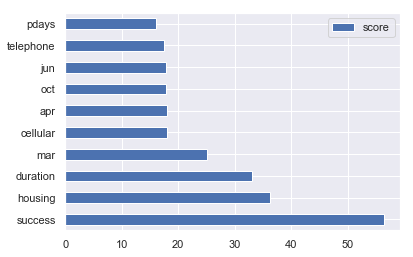

In [137]:
#https://stackoverflow.com/questions/37627923/how-to-get-feature-importance-in-xgboost
    
feature_important = best_clf.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data[:10].plot(kind='barh')

**Notes:**
1. XGBOOST gives us best results so find important feaures for it
2. As per the feature importance of XGBOOST it is clear that bank need to focus more on clients with success in previous campaign. Whether client uses cellular phone or not and the month in which client is being called play a vital role


In [133]:
#importance of all features in descending order
data

,score
success,56.446259
housing,36.314957
duration,33.153461
mar,25.169390
cellular,18.102162
apr,17.962494
oct,17.929595
jun,17.894808
telephone,17.405034
pdays,16.029970


# ROC Curve

In [102]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [103]:
# add FPR, TPR and AUC for every algorithm
result_table=result_table.append({'classifiers':"KNN Classifier",'fpr':fprKNN,'tpr':tprKNN,'auc':aucScoreKNN}, ignore_index=True)
result_table=result_table.append({'classifiers':"Naive Bayes",'fpr':fprNB,'tpr':tprNB,'auc':aucScoreNB}, ignore_index=True)
result_table=result_table.append({'classifiers':"Logistic Regression",'fpr':fprLR,'tpr':tprLR,'auc':aucScoreLR}, ignore_index=True)

result_table=result_table.append({'classifiers':"LR with Poly degree 2",'fpr':fprLRP2,'tpr':tprLRP2,'auc':aucScoreLRP2}, ignore_index=True)
result_table=result_table.append({'classifiers':"LR with Poly degree 3",'fpr':fprLRP3,'tpr':tprLRP3,'auc':aucScoreLRP3}, ignore_index=True)


result_table=result_table.append({'classifiers':"SVM Classifier",'fpr':fprSVM,'tpr':tprSVM,'auc':aucScoreSVM}, ignore_index=True)
result_table=result_table.append({'classifiers':"Deciosion Tree",'fpr':fprDT,'tpr':tprDT,'auc':aucScoreDT}, ignore_index=True)
result_table=result_table.append({'classifiers':"Random Forest",'fpr':fprRF,'tpr':tprRF,'auc':aucScoreRF}, ignore_index=True)
#result_table=result_table.append({'classifiers':"GBDT Classifier",'fpr':fprGBDT,'tpr':tprGBDT,'auc':aucScoreGBDT}, ignore_index=True)
result_table=result_table.append({'classifiers':"XGBoost Classifier",'fpr':fprXGBOOST,'tpr':tprXGBOOST,'auc':aucScoreXGBOOST}, ignore_index=True)

In [104]:
result_table.set_index('classifiers', inplace=True)

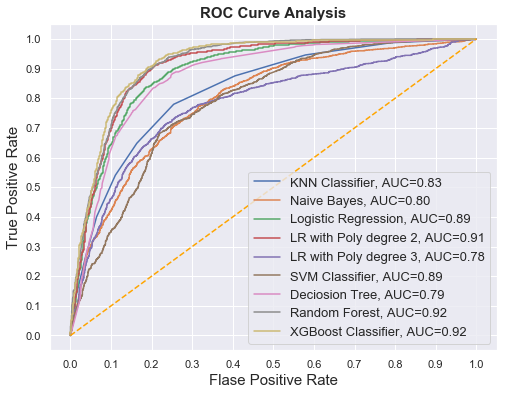

In [105]:
# https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot

# Plotting all ROC in one plot

sns.set()

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.2f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

**NOTES:**
1. Random Forest and XGBOOST has best AUC
2. Many of them have gives more or less same value of AUC
